# Univariate Analysis

### Import Libraries and Dataset

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [43]:
MathScore = pd.read_csv('score.csv')
MathScore

,Student,Score
0,1,85
1,2,57
2,3,49
3,4,77
4,5,54
5,6,69
6,7,52
7,8,33
8,9,68
9,10,83


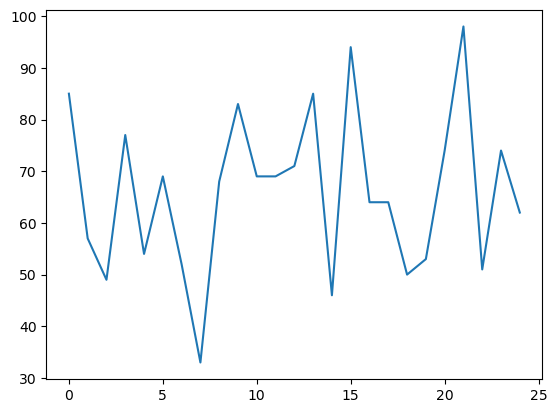

In [44]:
plt.plot(MathScore.Score)

### Central Tendency Measures

#### Mean

In [45]:
MathScore.Score.mean()

66.04

In [46]:
MathScore.Score.sum()/len(MathScore.Score)

66.04

#### Median

In [47]:
MathScore.Score.median()

68.0

In [48]:
sorteddata = MathScore.Score.sort_values().reset_index(drop = True)
sorteddata

0     33
1     46
2     49
3     50
4     51
5     52
6     53
7     54
8     57
9     62
10    64
11    64
12    68
13    69
14    69
15    69
16    71
17    74
18    74
19    77
20    83
21    85
22    85
23    94
24    98
Name: Score, dtype: int64

In [49]:
sorteddata[12]

68

#### Mode

In [50]:
MathScore.Score.mode()

0    69
Name: Score, dtype: int64

In [51]:
MathScore.Score.value_counts()

Score
69    3
85    2
74    2
64    2
46    1
51    1
98    1
53    1
50    1
94    1
71    1
57    1
83    1
68    1
33    1
52    1
54    1
77    1
49    1
62    1
Name: count, dtype: int64

In [52]:
MathScore.Score.describe()

count    25.000000
mean     66.040000
std      15.807382
min      33.000000
25%      53.000000
50%      68.000000
75%      74.000000
max      98.000000
Name: Score, dtype: float64

### Dispersion Measures

#### Range

In [53]:
MathScore.Score.min()

33

In [54]:
MathScore.Score.max()

98

In [55]:
MathScore.Score.max() - MathScore.Score.min()

65

#### Histogram

<Axes: >

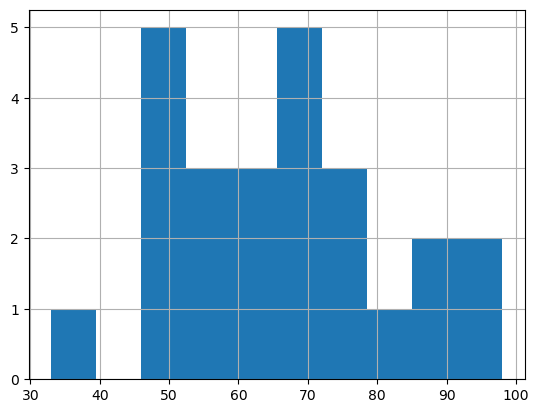

In [56]:
MathScore.Score.hist()

<Axes: >

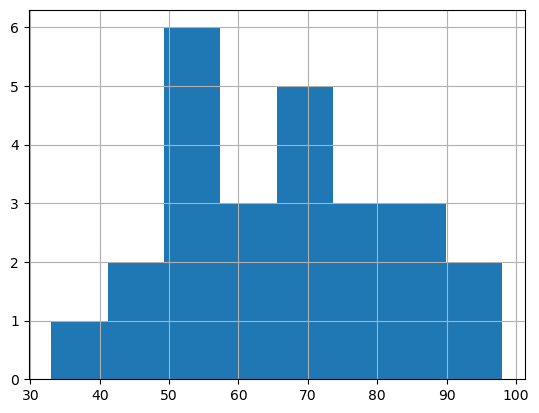

In [57]:
MathScore.Score.hist(bins = 8)

(array([1., 2., 6., 3., 5., 3., 3., 2.]),
 array([33.   , 41.125, 49.25 , 57.375, 65.5  , 73.625, 81.75 , 89.875,
        98.   ]),
 <BarContainer object of 8 artists>)

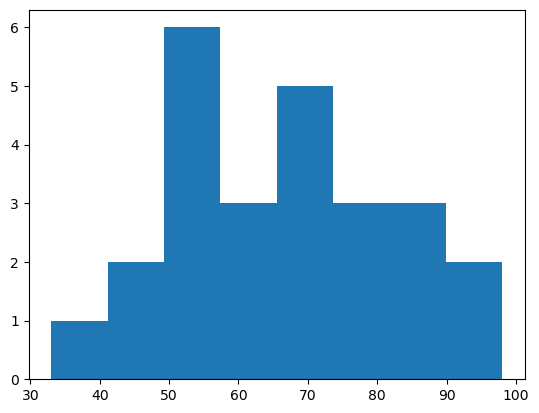

In [58]:
plt.hist(MathScore.Score, bins = 8)

C:\Users\srina\AppData\Local\Temp\ipykernel_24752\2870779201.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(MathScore.Score, bins = 8)


<Axes: xlabel='Score', ylabel='Density'>

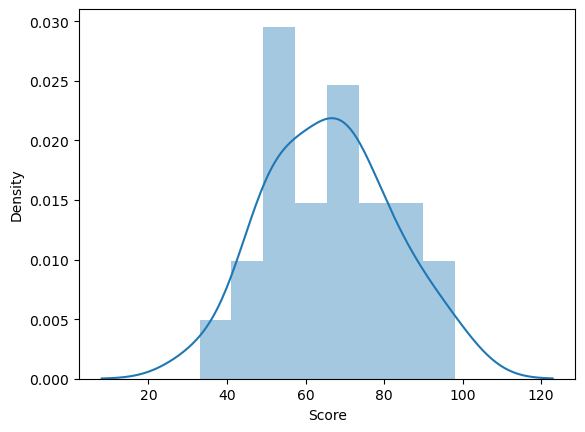

In [59]:
sns.distplot(MathScore.Score, bins = 8)

<Axes: xlabel='Score', ylabel='Density'>

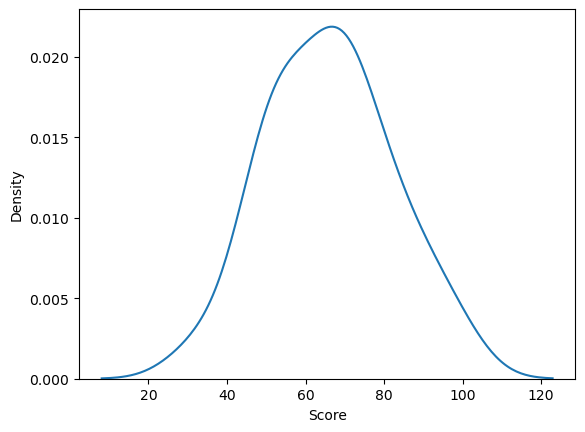

In [60]:
sns.kdeplot(MathScore.Score)

#### Box Plots

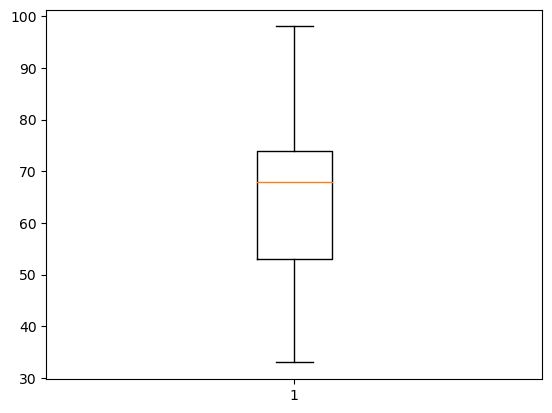

In [61]:
plt.boxplot(MathScore.Score);

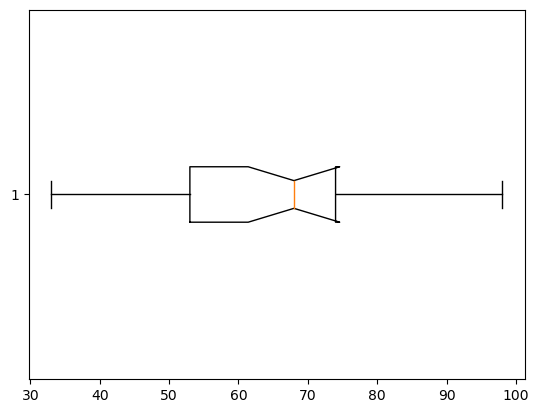

In [62]:
plt.boxplot(MathScore.Score, vert = False, notch = True);

<Axes: ylabel='Score'>

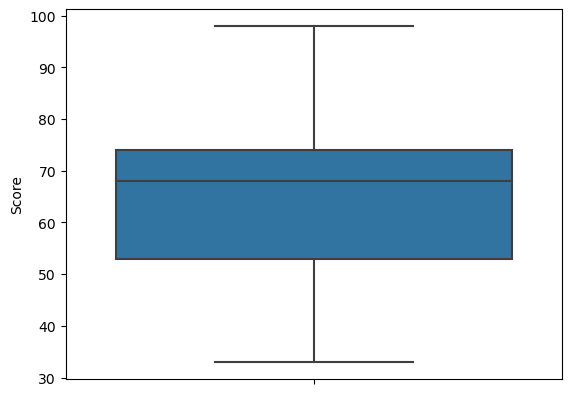

In [63]:
sns.boxplot(y = MathScore.Score)

In [64]:
quartiles = np.percentile(MathScore.Score,[0,25,50,75,100])
quartiles

array([33., 53., 68., 74., 98.])

In [65]:
quartiles[4] - quartiles[0]

65.0

In [66]:
quartiles[3] - quartiles[1]

21.0

In [67]:
quartiles[3], quartiles[1]

(74.0, 53.0)

In [68]:
MathScore.Score.describe()

count    25.000000
mean     66.040000
std      15.807382
min      33.000000
25%      53.000000
50%      68.000000
75%      74.000000
max      98.000000
Name: Score, dtype: float64

### Outliers

{'whiskers': [<matplotlib.lines.Line2D at 0x19b939a9bd0>,
 'caps': [<matplotlib.lines.Line2D at 0x19b939ab510>,
 'boxes': [<matplotlib.lines.Line2D at 0x19b939a9010>],
 'medians': [<matplotlib.lines.Line2D at 0x19b939aca10>],
 'fliers': [<matplotlib.lines.Line2D at 0x19b939ad4d0>],
 'means': []}

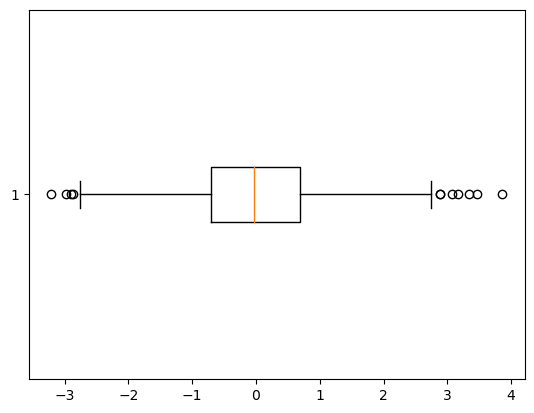

In [69]:
np.random.seed(100)
data = np.random.normal(size = 1000)
data = pd.Series(data)
plt.boxplot(data, vert = False)

In [70]:
data.describe()

count    1000.000000
mean       -0.016772
std         1.046366
min        -3.209955
25%        -0.706067
50%        -0.026293
75%         0.690765
max         3.857940
dtype: float64

In [71]:
min, q1, q2, q3, max = np.percentile(data, [0, 25, 50, 75, 100])
min, q1, q2, q3, max 

(-3.209955381978046,
 -0.7060673829740123,
 -0.026293144091200794,
 0.6907651169514902,
 3.85793967348964)

In [72]:
IQR = q3 - q1
IQR

1.3968324999255026

In [73]:
lower_limit = q1 - 1.5 * IQR
upper_limit = q3 + 1.5 * IQR
lower_limit, upper_limit

(-2.801316132862266, 2.786013866839744)

In [74]:
data = np.where(data < lower_limit, lower_limit, data)
data = np.where(data > upper_limit, upper_limit, data)

{'whiskers': [<matplotlib.lines.Line2D at 0x19b937e4550>,
 'caps': [<matplotlib.lines.Line2D at 0x19b937e5c50>,
 'boxes': [<matplotlib.lines.Line2D at 0x19b937dba90>],
 'medians': [<matplotlib.lines.Line2D at 0x19b937e6b90>],
 'fliers': [<matplotlib.lines.Line2D at 0x19b937e4410>],
 'means': []}

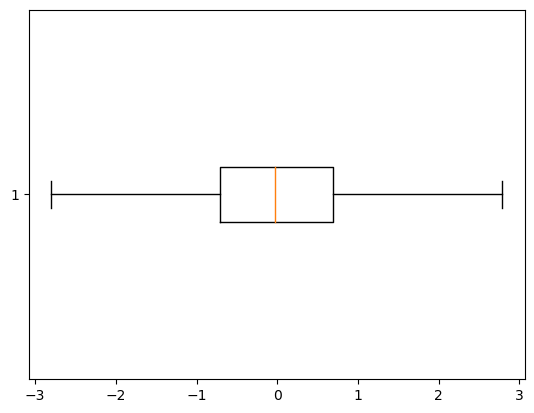

In [75]:
plt.boxplot(data, vert = False)

### Variance and Standard Deviation

In [76]:
MathScore.Score.var()

249.87333333333342

In [77]:
MathScore.Score.mean()

66.04

In [78]:
MathScore.Score.var(ddof = 0) ** 0.5

15.488008264460607

In [79]:
MathScore['Dist'] = (MathScore.Score - MathScore.Score.mean()) ** 2

In [80]:
MathScore.Dist.mean()

239.87840000000003

In [81]:
MathScore.Dist.sum()/(len(MathScore.Score)-1)

249.87333333333336

In [82]:
MathScore.Score.var() ** 0.5

15.807382241640562